In [140]:
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, TargetEncoder, OrdinalEncoder

#Dimensionality Reduction
from sklearn.decomposition import PCA

#Model selection
from sklearn.model_selection import train_test_split, GridSearchCV

#Model
from sklearn.svm import SVC

#Evaluation
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    confusion_matrix,
    roc_curve,
    auc
)

In [141]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# **Feature Engineering:**

In [142]:
df['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [143]:
#for linear regression: (one-hot-encoding for tree model)

enc = OrdinalEncoder(categories=[["Down", "Flat", "Up"]])
df['ST_Slope'] = enc.fit_transform(df[['ST_Slope']])
df


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,2.0,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,1.0,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,2.0,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,1.0,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,1.0,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,1.0,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,1.0,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,1.0,1


In [144]:

cat_cols = ["Sex", "ExerciseAngina", "ChestPainType", "RestingECG"]

ohe = OneHotEncoder(handle_unknown='ignore', drop="if_binary", sparse_output=False).set_output(transform='pandas')
ohe_transform = ohe.fit_transform(df[cat_cols])
ohe_transform



,Sex_M,ExerciseAngina_Y,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
913,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
914,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
915,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
916,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [145]:
df = pd.concat([df, ohe_transform], axis=1).drop(columns = cat_cols)
df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ST_Slope,HeartDisease,Sex_M,ExerciseAngina_Y,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST
0,40,140,289,0,172,0.0,2.0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,49,160,180,0,156,1.0,1.0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,130,283,0,98,0.0,2.0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,48,138,214,0,108,1.5,1.0,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,54,150,195,0,122,0.0,2.0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1.0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
914,68,144,193,1,141,3.4,1.0,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
915,57,130,131,0,115,1.2,1.0,1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
916,57,130,236,0,174,0.0,1.0,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [146]:
#put 'HeartDisease' label back in the end

col = "HeartDisease"
tmpcol = df.pop(col)
df[col] = tmpcol
df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ST_Slope,Sex_M,ExerciseAngina_Y,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,HeartDisease
0,40,140,289,0,172,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
1,49,160,180,0,156,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
2,37,130,283,0,98,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
3,48,138,214,0,108,1.5,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
4,54,150,195,0,122,0.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1
914,68,144,193,1,141,3.4,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
915,57,130,131,0,115,1.2,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
916,57,130,236,0,174,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1


# analyzing statistics in the datasets to understand it better:

In [147]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    int64  
 2   Cholesterol        918 non-null    int64  
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    int64  
 5   Oldpeak            918 non-null    float64
 6   ST_Slope           918 non-null    float64
 7   Sex_M              918 non-null    float64
 8   ExerciseAngina_Y   918 non-null    float64
 9   ChestPainType_ASY  918 non-null    float64
 10  ChestPainType_ATA  918 non-null    float64
 11  ChestPainType_NAP  918 non-null    float64
 12  ChestPainType_TA   918 non-null    float64
 13  RestingECG_LVH     918 non-null    float64
 14  RestingECG_Normal  918 non-null    float64
 15  RestingECG_ST      918 non-null    float64
 16  HeartDisease       918 non

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ST_Slope,Sex_M,ExerciseAngina_Y,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,1.361656,0.789760,0.404139,0.540305,0.188453,0.221133,0.050109,0.204793,0.601307,0.193900,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.607056,0.407701,0.490992,0.498645,0.391287,0.415236,0.218289,0.403770,0.489896,0.395567,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RestingBP'}>,
        <Axes: title={'center': 'Cholesterol'}>,
        <Axes: title={'center': 'FastingBS'}>],
       [<Axes: title={'center': 'MaxHR'}>,
        <Axes: title={'center': 'Oldpeak'}>,
        <Axes: title={'center': 'ST_Slope'}>,
        <Axes: title={'center': 'Sex_M'}>],
       [<Axes: title={'center': 'ExerciseAngina_Y'}>,
        <Axes: title={'center': 'ChestPainType_ASY'}>,
        <Axes: title={'center': 'ChestPainType_ATA'}>,
        <Axes: title={'center': 'ChestPainType_NAP'}>],
       [<Axes: title={'center': 'ChestPainType_TA'}>,
        <Axes: title={'center': 'RestingECG_LVH'}>,
        <Axes: title={'center': 'RestingECG_Normal'}>,
        <Axes: title={'center': 'RestingECG_ST'}>],
       [<Axes: title={'center': 'HeartDisease'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

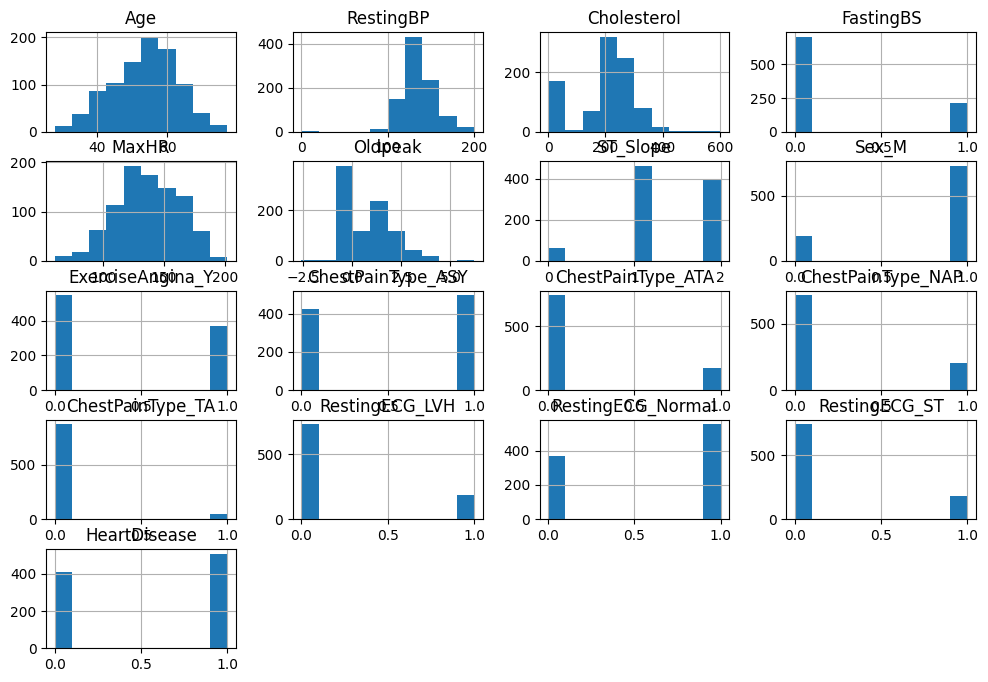

In [148]:
df.hist(figsize=(12, 8))

<Axes: xlabel='HeartDisease'>

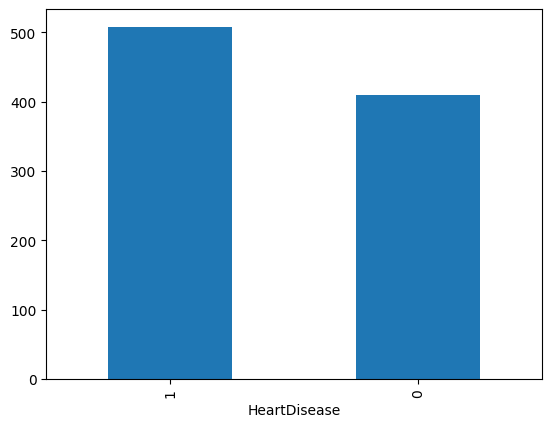

In [149]:
df['HeartDisease'].value_counts().plot(kind='bar')

In [150]:
df.corr()
correlation_matrix = df.corr()
print('correlations between features:' )
print(correlation_matrix)
print('\n')
print('correlation between featrues and target: \n')
print(correlation_matrix['HeartDisease'].sort_values(ascending=False))

correlations between features:
                        Age  RestingBP  Cholesterol  FastingBS     MaxHR  \
Age                1.000000   0.254399    -0.095282   0.198039 -0.382045   
RestingBP          0.254399   1.000000     0.100893   0.070193 -0.112135   
Cholesterol       -0.095282   0.100893     1.000000  -0.260974  0.235792   
FastingBS          0.198039   0.070193    -0.260974   1.000000 -0.131438   
MaxHR             -0.382045  -0.112135     0.235792  -0.131438  1.000000   
Oldpeak            0.258612   0.164803     0.050148   0.052698 -0.160691   
ST_Slope          -0.268264  -0.075162     0.111471  -0.175774  0.343419   
Sex_M              0.055750   0.005133    -0.200092   0.120076 -0.189186   
ExerciseAngina_Y   0.215793   0.155101    -0.034166   0.060451 -0.370425   
ChestPainType_ASY  0.166607   0.048824    -0.120531   0.131176 -0.354963   
ChestPainType_ATA -0.218165  -0.046153     0.150954  -0.140514  0.253735   
ChestPainType_NAP -0.011335  -0.041348    -0.006634  -0.0

# visulizing correlations:

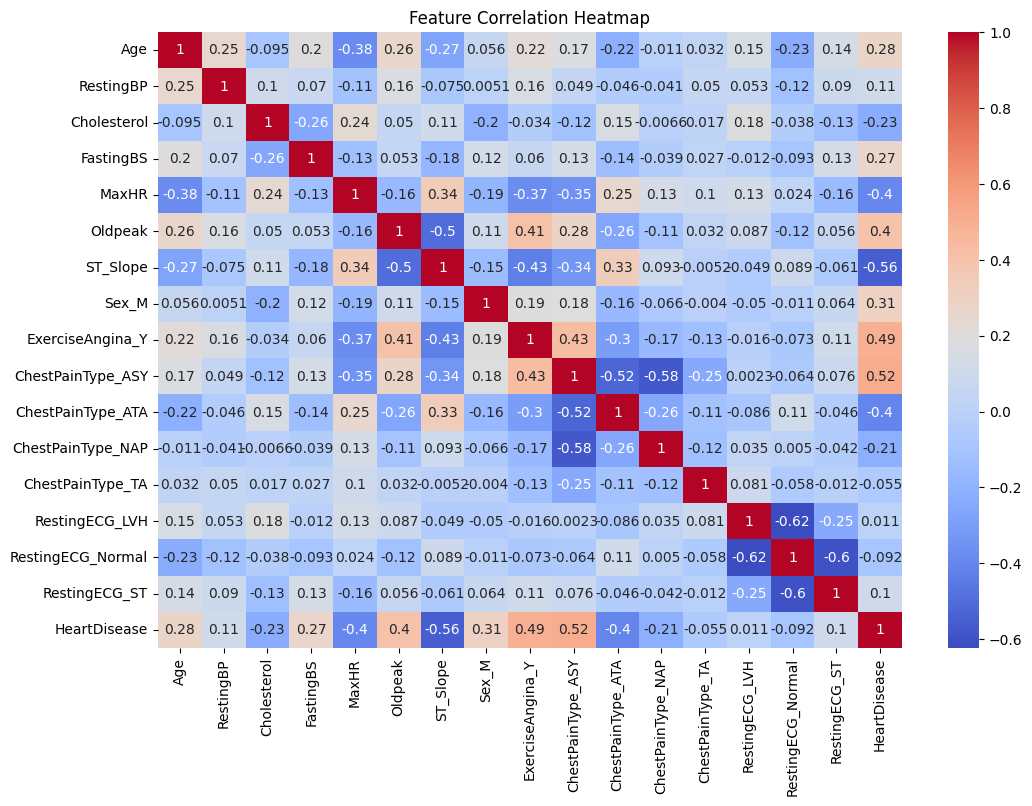

In [159]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# splitting the dataset train_test:

In [160]:
X_df = df.iloc[:, :-1]
y_df = df.iloc[:, -1]

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size = 0.2, random_state = 1)
X_train

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ST_Slope,Sex_M,ExerciseAngina_Y,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST
852,43,120,177,0,120,2.5,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
121,52,125,272,0,139,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
664,65,150,225,0,114,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
187,41,120,237,1,138,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
108,50,140,129,0,135,0.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,54,108,267,0,167,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
72,52,120,182,0,150,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
908,63,140,187,0,144,4.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
235,39,120,200,0,160,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


# Scaling:

In [174]:
scaler = StandardScaler()

columns_to_scale = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]

X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

X_train
X_train.describe().round(3)


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ST_Slope,Sex_M,ExerciseAngina_Y,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST
count,734.000,734.000,734.000,734.000,734.000,734.000,734.000,734.000,734.000,734.000,734.000,734.000,734.000,734.000,734.000,734.000
mean,-0.000,-0.000,-0.000,0.230,0.000,0.000,1.386,0.786,0.395,0.537,0.181,0.229,0.053,0.207,0.594,0.199
std,1.001,1.001,1.001,0.421,1.001,1.001,0.586,0.410,0.489,0.499,0.385,0.420,0.224,0.405,0.491,0.399
min,-2.727,-2.957,-1.776,0.000,-3.066,-3.304,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,-0.687,-0.706,-0.243,0.000,-0.685,-0.811,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,0.065,-0.143,0.223,0.000,0.090,-0.332,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000
75%,0.710,0.420,0.626,0.000,0.745,0.627,2.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000
max,2.536,3.797,3.652,1.000,2.571,5.134,2.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


# Training the model:

In [189]:
classifier = SVC(C=1 ,kernel = 'rbf', gamma=0.1 ,probability=True, random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# confusion matrix:

In [190]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('accuracy:', accuracy_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))

[[ 63  11]
 [ 10 100]]
accuracy: 0.8858695652173914
recall: 0.9090909090909091


# ROC  curve:

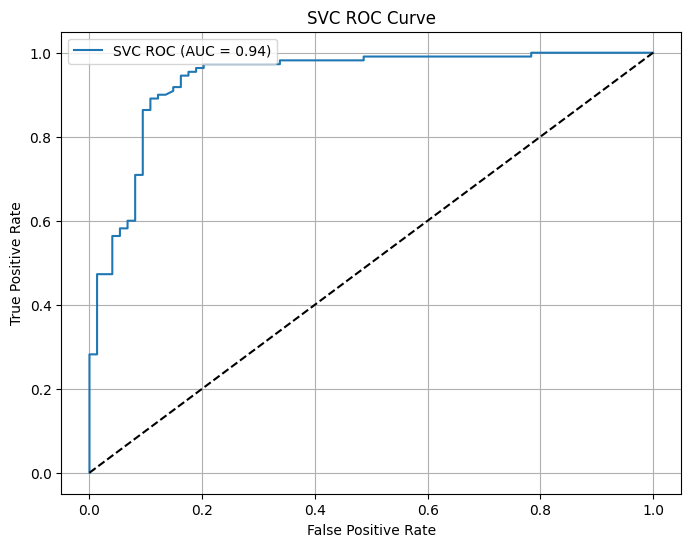

In [191]:
y_scores = classifier.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

#Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'SVC ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVC ROC Curve')
plt.legend()
plt.grid()
plt.show()

# tuning the hyperparameters: (with 'f1' because 'recall' returns terrible accuracy)

In [188]:
param_grid = {
    'C': [0.001,0.01,0.1, 1],  # Regularization parameter
    'kernel': ['linear', 'rbf'], # Kernel types
    'gamma': ['scale', 0.001, 0.01, 0.1, 1, 10],
}

grid_search = GridSearchCV(classifier, param_grid, cv=10, scoring='f1', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best Score: 0.8694648850605088
